<a href="https://colab.research.google.com/github/annisapraditha/tugaspraktikum_ML5/blob/main/Kegiatan_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/RESEARCH CENTER/DATASETS/Modul 5"

In [ ]:
%cd /content/drive/MyDrive/RESEARCH CENTER/DATASETS/Modul 5

/content/drive/MyDrive/RESEARCH CENTER/DATASETS/Modul 5


In [ ]:
!kaggle datasets download -d wanderdust/skin-lesion-analysis-toward-melanoma-detection

100% 11.3G/11.3G [04:22<00:00, 37.8MB/s]
100% 11.3G/11.3G [04:22<00:00, 46.2MB/s]


In [ ]:
!unzip \*.zip && rm *.zip

Archive:  skin-lesion-analysis-toward-melanoma-detection.zip
  inflating: skin-lesions/test/melanoma/ISIC_0012258.jpg  
  inflating: skin-lesions/test/melanoma/ISIC_0012356.jpg  
  inflating: skin-lesions/test/melanoma/ISIC_0012369.jpg  
  inflating: skin-lesions/test/melanoma/ISIC_0012395.jpg  
  inflating: skin-lesions/test/melanoma/ISIC_0012425.jpg  
  inflating: skin-lesions/test/melanoma/ISIC_0012758.jpg  
  inflating: skin-lesions/test/melanoma/ISIC_0012989.jpg  
  inflating: skin-lesions/test/melanoma/ISIC_0013072.jpg  
  inflating: skin-lesions/test/melanoma/ISIC_0013073.jpg  
  inflating: skin-lesions/test/melanoma/ISIC_0013242.jpg  
  inflating: skin-lesions/test/melanoma/ISIC_0013277.jpg  
  inflating: skin-lesions/test/melanoma/ISIC_0013321.jpg  
  inflating: skin-lesions/test/melanoma/ISIC_0013374.jpg  
  inflating: skin-lesions/test/melanoma/ISIC_0013411.jpg  
  inflating: skin-lesions/test/melanoma/ISIC_0013414.jpg  
  inflating: skin-lesions/test/melanoma/ISIC_0013455.j

In [ ]:
pip install split-folders

In [ ]:
import splitfolders

splitfolders.ratio('/content/drive/MyDrive/RESEARCH CENTER/DATASETS/Modul 5/', output="Datasetnew", seed=42, ratio=(.85, .14, .01), group_prefix=None)

Copying files: 1744 files [06:24,  4.54 files/s]


In [ ]:
import os
base_dir = '/content/drive/MyDrive/RESEARCH CENTER/DATASETS/Modul 5/DATASETS/Datasetnew'
# base_dir = 'Dataset2_split'

In [ ]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

In [ ]:
train_melanoma = os.path.join(train_dir, 'melanoma')
train_nevus = os.path.join(train_dir, 'nevus')
train_seborrheic = os.path.join(train_dir, 'seborrheic')

In [ ]:
test_melanoma = os.path.join(test_dir, 'melanoma')
test_nevus = os.path.join(test_dir, 'nevus')
test_seborrheic = os.path.join(test_dir, 'seborrheic')

In [ ]:
val_melanoma = os.path.join(val_dir, 'melanoma')
val_nevus = os.path.join(val_dir, 'nevus')
val_seborrheic = os.path.join(val_dir, 'seborrheic')

In [ ]:
print('total training melanoma images:', len(os.listdir(train_melanoma)))
print('total training nevus images:', len(os.listdir(train_nevus)))
print('total training seborrheic images:', len(os.listdir(train_seborrheic)))
print('total validation melanoma images:', len(os.listdir(val_melanoma)))
print('total validation nevus images:', len(os.listdir(val_nevus)))
print('total validation seborrheic images:', len(os.listdir(val_seborrheic)))
print('total test melanoma images:', len(os.listdir(test_melanoma)))
print('total test nevus images:', len(os.listdir(test_nevus)))
print('total test seborrheic images:', len(os.listdir(test_seborrheic)))

total training melanoma images: 442
total training nevus images: 711
total training seborrheic images: 328
total validation melanoma images: 72
total validation nevus images: 117
total validation seborrheic images: 54
total test melanoma images: 7
total test nevus images: 9
total test seborrheic images: 4


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./225,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
)

val_datagen = ImageDataGenerator(
    rescale=1./255
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128,128),
    batch_size=32,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(128,128),
    batch_size=32,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True
)

test_generator = val_datagen.flow_from_directory(
    test_dir,
    target_size=(128,128),
    batch_size=32,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True
)

Found 1481 images belonging to 3 classes.
Found 243 images belonging to 3 classes.
Found 20 images belonging to 3 classes.


In [ ]:
train_generator.class_indices

{'melanoma': 0, 'nevus': 1, 'seborrheic': 2}

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
aug = ImageDataGenerator(rotation_range=30, width_shift_range=0.1,
                        height_shift_range=0.1, shear_range=0.2, 
                        zoom_range=0.8, horizontal_flip=True,
                        fill_mode="nearest")

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input
from tensorflow.keras.applications import MobileNetV2, DenseNet121

In [ ]:
import tensorflow as tf
from keras import layers, Model
from keras.layers import InputLayer, Activation, Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization, Concatenate, Input, GlobalAveragePooling2D
from keras.models import Sequential

model_1 = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128,128,3))
model_2 = DenseNet121(weights='imagenet', include_top=False, input_shape=(128,128,3))

29097984/29084464 [==============================] - 0s 0us/step


In [ ]:
for layer in model_1.layers:
  layer.trainable=False

for layer in model_2.layers:
  layer.trainable=False

In [ ]:
input = Input(shape=(128,128,3))
model_tf = model_1(input)
model_tf1 = model_2(input)
net_1 = Concatenate()([model_tf, model_tf1])
net_1 = Flatten()(net_1)
net_1 = Dense(128, activation='relu')(net_1)
net_1 = Dense(64, activation='relu')(net_1)
net_1 = Dense(3, activation='softmax')(net_1)

model_1 = Model(inputs=input, outputs=net_1)
model_1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 mobilenetv2_1.00_128 (Function  (None, 4, 4, 1280)  2257984     ['input_3[0][0]']                
 al)                                                                                              
                                                                                                  
 densenet121 (Functional)       (None, 4, 4, 1024)   7037504     ['input_3[0][0]']                
                                                                                              

In [ ]:
from tensorflow.keras.optimizers import Adam, RMSprop
model_1.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.0001),
              metrics=['accuracy'])

In [ ]:
import time

start=time.time()
history = model_1.fit(train_generator,
          epochs=100,
          steps_per_epoch=10,
          validation_data=val_generator,
          verbose=1)

Epoch 1/100
10/10 [==============================] - 418s 42s/step - loss: 1.1779 - accuracy: 0.4613 - val_loss: 1.1317 - val_accuracy: 0.4568
Epoch 2/100
10/10 [==============================] - 270s 28s/step - loss: 0.9423 - accuracy: 0.5656 - val_loss: 0.9775 - val_accuracy: 0.5432
Epoch 3/100
10/10 [==============================] - 263s 27s/step - loss: 0.8883 - accuracy: 0.5844 - val_loss: 0.9115 - val_accuracy: 0.5844
Epoch 4/100
10/10 [==============================] - 215s 22s/step - loss: 0.8634 - accuracy: 0.5960 - val_loss: 0.9428 - val_accuracy: 0.5720
Epoch 5/100
10/10 [==============================] - 211s 22s/step - loss: 0.8431 - accuracy: 0.6031 - val_loss: 0.8687 - val_accuracy: 0.6008
Epoch 6/100
10/10 [==============================] - 194s 20s/step - loss: 0.7523 - accuracy: 0.6469 - val_loss: 0.8348 - val_accuracy: 0.6214
Epoch 7/100
10/10 [==============================] - 189s 19s/step - loss: 0.8293 - accuracy: 0.6700 - val_loss: 0.9695 - val_accuracy: 0.6049

In [ ]:
# TULIS CODE UNTUK MENCETAK LAMA TRAINING TIME DISINI
print("waktu = ", time.time() - start, "detik")

waktu =  18702.74273109436 detik


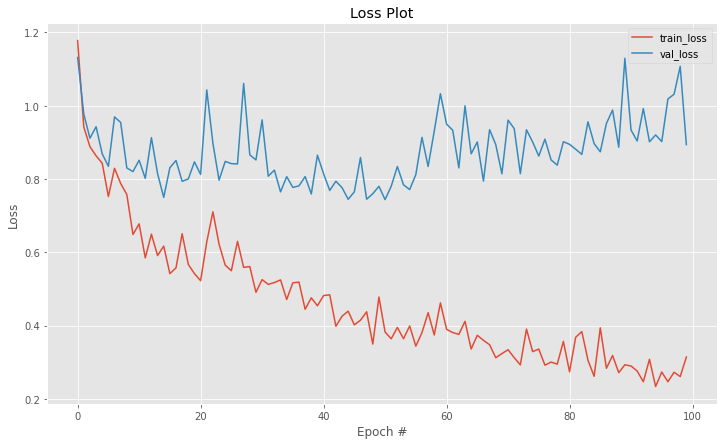

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use("ggplot")
plt.figure(figsize=(12,7))
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

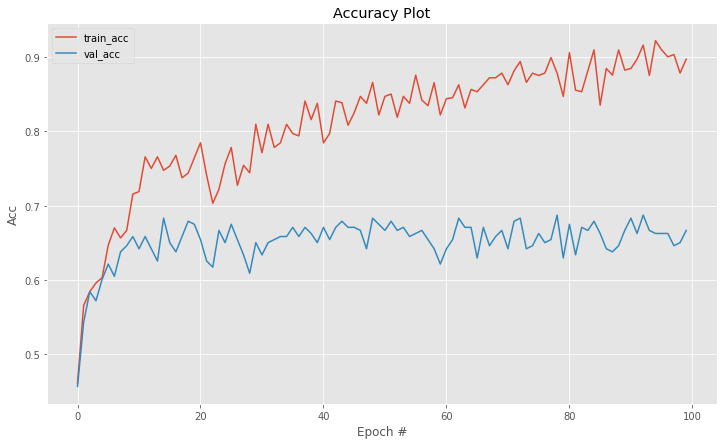

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(12,7))
plt.plot(history.history["accuracy"], label="train_acc")
plt.plot(history.history["val_accuracy"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [ ]:
score = model_1.evaluate(test_generator)

print('Loss: {:.2f}'.format(score[0]))
print('Accuracy: {:.2f}'.format(score[1]))

1/1 [==============================] - 5s 5s/step - loss: 1.2232 - accuracy: 0.6500
Loss: 1.22
Accuracy: 0.65


In [61]:
test_generator.reset()
pred=model_1.predict_generator(test_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


In [62]:
import numpy as np

predicted_class_indices=np.argmax(pred,axis=1)

In [63]:
# true_class_indices=np.argmax(test_generator.classes,axis=1)
test_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2],
      dtype=int32)

In [64]:
pred

array([[9.8580325e-01, 5.0907176e-05, 1.4145921e-02],
       [9.8308563e-01, 1.6624589e-02, 2.8967910e-04],
       [1.8361052e-02, 9.7396457e-01, 7.6743341e-03],
       [1.0944529e-05, 8.7237259e-04, 9.9911672e-01],
       [7.0980755e-03, 9.7591478e-01, 1.6987206e-02],
       [7.4513531e-01, 2.2756986e-01, 2.7294848e-02],
       [8.6134775e-03, 2.1928184e-01, 7.7210462e-01],
       [1.0349307e-01, 8.9019835e-01, 6.3086208e-03],
       [2.5175186e-02, 9.5705575e-01, 1.7769000e-02],
       [2.2246551e-02, 6.5307831e-03, 9.7122270e-01],
       [3.1961337e-01, 6.7868453e-01, 1.7021146e-03],
       [9.9887878e-01, 7.3123170e-04, 3.8992122e-04],
       [4.1112119e-01, 5.6482607e-01, 2.4052707e-02],
       [9.3096036e-01, 6.7149557e-02, 1.8900308e-03],
       [4.5026940e-01, 5.1867229e-01, 3.1058280e-02],
       [2.3294043e-02, 9.7063631e-01, 6.0695931e-03],
       [2.6920789e-03, 1.9276345e-01, 8.0454451e-01],
       [4.5181073e-02, 9.2782891e-01, 2.6990032e-02],
       [5.5707908e-01, 3.457

In [65]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]
true_class =[labels[k] for k in test_generator.classes]

In [66]:
true_class

['melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'seborrheic',
 'seborrheic',
 'seborrheic',
 'seborrheic']

In [67]:
predictions

['melanoma',
 'melanoma',
 'nevus',
 'seborrheic',
 'nevus',
 'melanoma',
 'seborrheic',
 'nevus',
 'nevus',
 'seborrheic',
 'nevus',
 'melanoma',
 'nevus',
 'melanoma',
 'nevus',
 'nevus',
 'seborrheic',
 'nevus',
 'melanoma',
 'nevus']

In [68]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(test_generator.classes, predicted_class_indices))

              precision    recall  f1-score   support

           0       0.50      0.43      0.46         7
           1       0.60      0.67      0.63         9
           2       0.25      0.25      0.25         4

    accuracy                           0.50        20
   macro avg       0.45      0.45      0.45        20
weighted avg       0.49      0.50      0.50        20



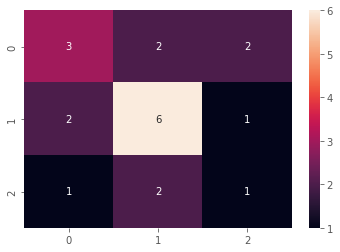

In [69]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf = confusion_matrix(test_generator.classes, predicted_class_indices)
sns.heatmap(conf, annot=True, fmt=".0f")

In [70]:
test_generator.filenames

['melanoma/ISIC_0000146.jpg',
 'melanoma/ISIC_0000531.jpg',
 'melanoma/ISIC_0001100.jpg',
 'melanoma/ISIC_0010011.jpg',
 'melanoma/ISIC_0012512.jpg',
 'melanoma/ISIC_0013321.jpg',
 'melanoma/ISIC_0013581.jpg',
 'nevus/ISIC_0000059.jpg',
 'nevus/ISIC_0012281.jpg',
 'nevus/ISIC_0012384.jpg',
 'nevus/ISIC_0012770.jpg',
 'nevus/ISIC_0012877.jpg',
 'nevus/ISIC_0012987.jpg',
 'nevus/ISIC_0014851.jpg',
 'nevus/ISIC_0015983.jpg',
 'nevus/ISIC_0015988.jpg',
 'seborrheic/ISIC_0012183.jpg',
 'seborrheic/ISIC_0012415.jpg',
 'seborrheic/ISIC_0014625.jpg',
 'seborrheic/ISIC_0015170.jpg']

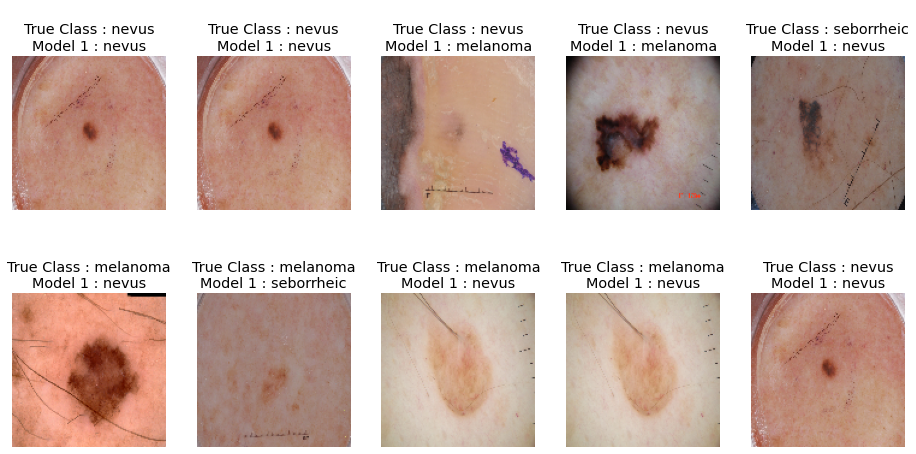

In [71]:
x= test_generator.next()
plt.figure(figsize=(16,8))
for i, idx in enumerate(np.random.randint(x[0].shape[0], size=10), start=1):
    plt.subplot(2, 5, i)
    image = x[0]
    plt.imshow(image[idx])
    
    plt.title("\nTrue Class : "+true_class[idx]+
              "\nModel 1 : "+predictions[idx])
    # plt.title()
    plt.axis('off')